In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from datetime import datetime # Para pegar a data atual
import matplotlib.dates as mdates

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

'''
LINK: https://analytics.google.com/

USUÁRIOS E NOVOS USUÁRIOS

https://analytics.google.com/analytics/web/#/p308444970/reports/reportinghub?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130

CAMINHO: barra lateral > Relatórios

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

'''
LINK: https://analytics.google.com/

VISUALIZAÇÕES

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-engagement-overview&ruid=lifecycle-engagement-overview,life-cycle,engagement&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Engajamento (dropdown) > Visão geral

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

'''
LINK: https://analytics.google.com/

NOVOS USUÁRIOS E USUÁRIOS RECORRENTES

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-retention-overview&ruid=lifecycle-retention-overview,life-cycle,retention&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Retenção

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

PEGAR  O VALOR DE USUÁRIOS RECORRENTE POR SCRAPPING, DIRETO DO ANALYTICS, POIS OS VALORES DE LA PROVAVELMENT SÃO DE USUÁRIOS UNICOS.

'''

import csv

def encontrar_frase_em_csv(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-8') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

def remover_ultima_linha(arquivo):
    dados = arquivo
    
    # Verificar se a última linha atende ao critério
    ultima_linha = dados.iloc[-1]
    if ultima_linha['Nº dia'] not in ['0030', '0029', '0028', '28', '29', '30']:
        # Se não atender ao critério, remover a última linha
        dados = dados.iloc[:-1]

    return dados
def transforma_int(arquivo):
    
    for i in range(len(arquivo.iloc[:,0])):
        arquivo.iloc[i,0] = int(arquivo.iloc[i,0])
    
    for i in range(len(arquivo.iloc[:,1])):
        arquivo.iloc[i,1] = int(arquivo.iloc[i,1])
    
    return arquivo

# USUÁRIO ÚNICOS
usuarios_unicos_final = encontrar_frase_em_csv('uniNovos.csv', 'Novos usuários')

usuarios_unicos = pd.read_csv('uniNovos.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos = remover_ultima_linha(usuarios_unicos)
usuarios_unicos = transforma_int(usuarios_unicos)

usuarios_unicos['Nº dia'] = usuarios_unicos['Nº dia']+1


# NOVOS USUÁRIOS
novos_usuarios_final = encontrar_frase_em_csv('uniNovos.csv', 'Tempo médio de engajamento')

novos_usuarios = pd.read_csv('uniNovos.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-47).dropna()

novos_usuarios = remover_ultima_linha(novos_usuarios)
novos_usuarios = transforma_int(novos_usuarios)

novos_usuarios['Nº dia'] = novos_usuarios['Nº dia']+1


# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv('visualizacoes.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv('visualizacoes.csv', 'Contagem de eventos')

visualizacoes = pd.read_csv('visualizacoes.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-116).dropna()

visualizacoes = remover_ultima_linha(visualizacoes)
visualizacoes = transforma_int(visualizacoes)

visualizacoes['Nº dia'] = visualizacoes['Nº dia']+1


# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv('novosRec.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv('novosRec.csv', 'Dia 1')

usuarios_recorrentes = pd.read_csv('novosRec.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-48).dropna()

usuarios_recorrentes = remover_ultima_linha(usuarios_recorrentes)
usuarios_recorrentes = transforma_int(usuarios_recorrentes)

usuarios_recorrentes['Nº dia'] = usuarios_recorrentes['Nº dia']+1

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Visualizações", data=visualizacoes, label="Visualizações", linewidth=2.5, color=cores[2])
sns.lineplot(x="Nº dia", y="Usuários", data=usuarios_unicos, label="Usuários únicos", linewidth=2.5, color=cores[0])
sns.lineplot(x="Nº dia", y="Novos usuários", data=novos_usuarios, label="Novos usuários", linewidth=2.5, color=cores[1])
sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes, label="Usuários recorrentes", linewidth=2.5, color=cores[3])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Dados do portal do mês de ???")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

O arquivo uniNovos.csv não foi encontrado.


FileNotFoundError: [Errno 2] No such file or directory: 'uniNovos.csv'

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv

def encontrar_frase_em_csv(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-8') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

def remover_ultima_linha(arquivo):
    dados = arquivo
    
    # Verificar se a última linha atende ao critério
    ultima_linha = dados.iloc[-1]
    if ultima_linha['Nº dia'] not in ['0030', '0029', '0028', '28', '29', '30']:
        # Se não atender ao critério, remover a última linha
        dados = dados.iloc[:-1]

    return dados

def transforma_int(arquivo):
    
    for i in range(len(arquivo.iloc[:,0])):
        arquivo.iloc[i,0] = int(arquivo.iloc[i,0])
    
    for i in range(len(arquivo.iloc[:,1])):
        arquivo.iloc[i,1] = int(arquivo.iloc[i,1])
    
    return arquivo

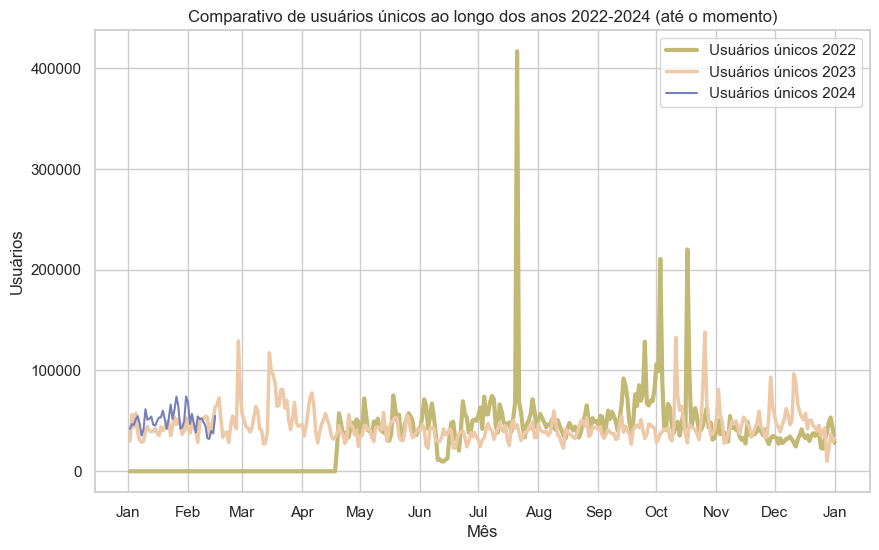

In [6]:
# USUÁRIO ÚNICOS 2022
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2022\uniNovos22.csv', 'Novos usuários')

usuarios_unicos22 = pd.read_csv(r'Portal\usuariosUnicosNovos\2022\uniNovos22.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos22 = remover_ultima_linha(usuarios_unicos22)
usuarios_unicos22 = transforma_int(usuarios_unicos22)

usuarios_unicos22['Nº dia'] = usuarios_unicos22['Nº dia']+1

# USUÁRIO ÚNICOS 2023
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2023\uniNovos23.csv', 'Novos usuários')

usuarios_unicos23 = pd.read_csv(r'Portal\usuariosUnicosNovos\2023\uniNovos23.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos23 = remover_ultima_linha(usuarios_unicos23)
usuarios_unicos23 = transforma_int(usuarios_unicos23)

usuarios_unicos23['Nº dia'] = usuarios_unicos23['Nº dia']+1

# USUÁRIO ÚNICOS 2024
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2024\uniNovos24.csv', 'Novos usuários')

usuarios_unicos24 = pd.read_csv(r'Portal\usuariosUnicosNovos\2024\uniNovos24.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos24 = remover_ultima_linha(usuarios_unicos24)
usuarios_unicos24 = transforma_int(usuarios_unicos24)

usuarios_unicos24['Nº dia'] = usuarios_unicos24['Nº dia']+1

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#C2B974","#777FBA","#EDC9A8"]
# cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274","#7AB","#EDA"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Usuários", data=usuarios_unicos22, label="Usuários únicos 2022", linewidth=3, color=cores[0])
sns.lineplot(x="Nº dia", y="Usuários", data=usuarios_unicos23, label="Usuários únicos 2023", linewidth=2.5, color=cores[2])
sns.lineplot(x="Nº dia", y="Usuários", data=usuarios_unicos24, label="Usuários únicos 2024", linewidth=1.5, color=cores[1])


# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Intervalo de 1 dia

# Formatando os rótulos do eixo x para incluir o nome do mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Exemplo: Jan 2024

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Mês")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Comparativo de usuários únicos ao longo dos anos 2022-2024 (até o momento)")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

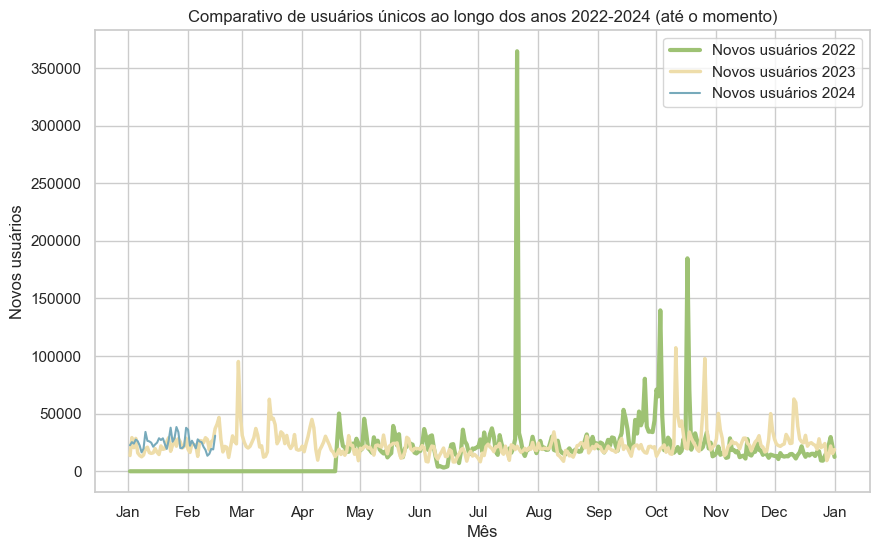

In [104]:
# NOVOS USUÁRIOS
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2022\uniNovos22.csv', 'Novos usuários')

novos_usuarios_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2022\uniNovos22.csv', 'Tempo médio de engajamento')

novos_usuarios22 = pd.read_csv(r'Portal\usuariosUnicosNovos\2022\uniNovos22.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-380).dropna()

#novos_usuarios = remover_ultima_linha(novos_usuarios)
novos_usuarios22 = transforma_int(novos_usuarios22)

novos_usuarios22['Nº dia'] = novos_usuarios22['Nº dia']+1

# NOVOS USUÁRIOS
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2023\uniNovos23.csv', 'Novos usuários')

novos_usuarios_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2023\uniNovos23.csv', 'Tempo médio de engajamento')

novos_usuarios23 = pd.read_csv(r'Portal\usuariosUnicosNovos\2023\uniNovos23.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-380).dropna()

#novos_usuarios = remover_ultima_linha(novos_usuarios)
novos_usuarios23 = transforma_int(novos_usuarios23)

novos_usuarios23['Nº dia'] = novos_usuarios23['Nº dia']+1

# NOVOS USUÁRIOS
usuarios_unicos_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2024\uniNovos24.csv', 'Novos usuários')

novos_usuarios_final = encontrar_frase_em_csv(r'Portal\usuariosUnicosNovos\2024\uniNovos24.csv', 'Tempo médio de engajamento')

novos_usuarios24 = pd.read_csv(r'Portal\usuariosUnicosNovos\2024\uniNovos24.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-60).dropna()

novos_usuarios = remover_ultima_linha(novos_usuarios)
novos_usuarios24 = transforma_int(novos_usuarios24)

novos_usuarios24['Nº dia'] = novos_usuarios24['Nº dia']+1

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#9EC274","#7AB","#EDA"]

# cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274","#7AB","#EDA"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Novos usuários", data=novos_usuarios22, label="Novos usuários 2022", linewidth=3, color=cores[0])
sns.lineplot(x="Nº dia", y="Novos usuários", data=novos_usuarios23, label="Novos usuários 2023", linewidth=2.5, color=cores[2])
sns.lineplot(x="Nº dia", y="Novos usuários", data=novos_usuarios24, label="Novos usuários 2024", linewidth=1.5, color=cores[1])


# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Intervalo de 1 dia

# Formatando os rótulos do eixo x para incluir o nome do mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Exemplo: Jan 2024

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Mês")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Comparativo de usuários únicos ao longo dos anos 2022-2024 (até o momento)")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

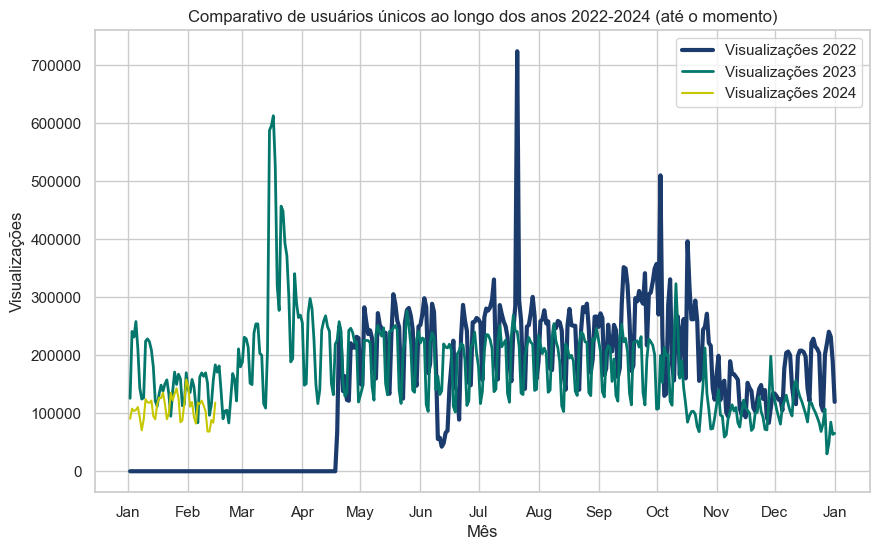

In [109]:
# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv(r'Portal\visualizacoes\2022\visualizacoes22.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv(r'Portal\visualizacoes\2022\visualizacoes22.csv', 'Contagem de eventos')

visualizacoes22 = pd.read_csv(r'Portal\visualizacoes\2022\visualizacoes22.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-1118).dropna()

visualizacoes22 = remover_ultima_linha(visualizacoes22)
visualizacoes22 = transforma_int(visualizacoes22)

visualizacoes22['Nº dia'] = visualizacoes22['Nº dia']+1

# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv(r'Portal\visualizacoes\2023\visualizacoes23.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv(r'Portal\visualizacoes\2023\visualizacoes23.csv', 'Contagem de eventos')

visualizacoes23 = pd.read_csv(r'Portal\visualizacoes\2023\visualizacoes23.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-1118).dropna()

visualizacoes23 = remover_ultima_linha(visualizacoes23)
visualizacoes23 = transforma_int(visualizacoes23)

visualizacoes23['Nº dia'] = visualizacoes23['Nº dia']+1

# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv(r'Portal\visualizacoes\2024\visualizacoes24.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv(r'Portal\visualizacoes\2024\visualizacoes24.csv', 'Contagem de eventos')

visualizacoes24 = pd.read_csv(r'Portal\visualizacoes\2024\visualizacoes24.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-158).dropna()

visualizacoes24 = remover_ultima_linha(visualizacoes24)
visualizacoes24 = transforma_int(visualizacoes24)

visualizacoes24['Nº dia'] = visualizacoes24['Nº dia']+1

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#1B3B6D","#03776B","#C7C700"]

# cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274","#7AB","#EDA"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Visualizações", data=visualizacoes22, label="Visualizações 2022", linewidth=3, color=cores[0])
sns.lineplot(x="Nº dia", y="Visualizações", data=visualizacoes23, label="Visualizações 2023", linewidth=2, color=cores[1])
sns.lineplot(x="Nº dia", y="Visualizações", data=visualizacoes24, label="Visualizações 2024", linewidth=1.5, color=cores[2])


# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Intervalo de 1 dia

# Formatando os rótulos do eixo x para incluir o nome do mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Exemplo: Jan 2024

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Mês")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Comparativo de usuários únicos ao longo dos anos 2022-2024 (até o momento)")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

In [136]:
# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2022\novosRec22.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2022\novosRec22.csv', 'Dia 1')

usuarios_recorrentes22 = pd.read_csv(r'Portal\usuariosRec\2022\novosRec22.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-383).dropna()

usuarios_recorrentes22 = remover_ultima_linha(usuarios_recorrentes22)
usuarios_recorrentes22 = transforma_int(usuarios_recorrentes22)

usuarios_recorrentes22['Nº dia'] = usuarios_recorrentes22['Nº dia']+1

# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2023\novosRec23.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2023\novosRec23.csv', 'Dia 1')

usuarios_recorrentes23 = pd.read_csv(r'Portal\usuariosRec\2023\novosRec23.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-383).dropna()

usuarios_recorrentes23 = remover_ultima_linha(usuarios_recorrentes23)
usuarios_recorrentes23 = transforma_int(usuarios_recorrentes23)

usuarios_recorrentes23['Nº dia'] = usuarios_recorrentes23['Nº dia']+1

# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv(r'Portal\usuariosRec\2024\novosRec24.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv(r'Portal\usuariosRec\2024\novosRec24.csv', 'Dia 1')

usuarios_recorrentes24 = pd.read_csv(r'Portal\usuariosRec\2024\novosRec24.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-63).dropna()

usuarios_recorrentes24 = remover_ultima_linha(usuarios_recorrentes24)
usuarios_recorrentes24 = transforma_int(usuarios_recorrentes24)

usuarios_recorrentes24['Nº dia'] = usuarios_recorrentes24['Nº dia']+1

,Nº dia,Usuários recorrentes
0,1,16630
1,2,19257
2,3,19590
3,4,20066
4,5,24034
5,6,21236
6,7,16591
7,8,19196
8,9,23755
9,10,22162


In [143]:
def usuRec_total(arquivo):
    # USUARIOS RECORRENTES
    recorrentes_inicio = encontrar_frase_em_csv(arquivo, 'Usuários recorrentes')
    recorrentes_final = encontrar_frase_em_csv(arquivo, 'Dia 1')

    usuarios_recorrentes = pd.read_csv(arquivo, skiprows=recorrentes_inicio-1, nrows=recorrentes_final-48).dropna()

    usuarios_recorrentes = remover_ultima_linha(usuarios_recorrentes)
    usuarios_recorrentes = transforma_int(usuarios_recorrentes)

    usuarios_recorrentes['Nº dia'] = usuarios_recorrentes['Nº dia']+1   
    
    usuarios_recorrentes_total = usuarios_recorrentes['Usuários recorrentes'].sum().astype('int')
    
    return usuarios_recorrentes_total

def percentUsuRec(usuRecANALYTICS,usuRecTABELA):
    
    porcentagem = (usuRecANALYTICS/usuRecTABELA)*100
    
    return porcentagem

In [146]:
novosRecAbril22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecAbril.csv')
novosRecMaio22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecMaio.csv')
novosRecJunho22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecJunho.csv')
novosRecJulho22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecJulho.csv')
novosRecAgosto22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecAgosto.csv')
novosRecSetembro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecSetembro.csv')
novosRecOutubro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecOutubro.csv')
novosRecNovembro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecNovembro.csv')
novosRecDezembro22 = usuRec_total(r'Portal\usuariosRec\2022\novosRecDezembro.csv')

usuRec_2022 = [0, 0, 0, 72000, 149000, 168000, 252000, 234000, 334000, 338000, 203000, 172000]

usuRec_2022Percent = [0, 0, 0, percentUsuRec(usuRec_2022[3], novosRecAbril22), percentUsuRec(usuRec_2022[4], novosRecMaio22), percentUsuRec(usuRec_2022[5], novosRecJunho22), percentUsuRec(usuRec_2022[6], novosRecJulho22), percentUsuRec(usuRec_2022[7], novosRecAgosto22), percentUsuRec(usuRec_2022[8], novosRecSetembro22), percentUsuRec(usuRec_2022[9], novosRecOutubro22), percentUsuRec(usuRec_2022[10], novosRecNovembro22), percentUsuRec(usuRec_2022[11], novosRecDezembro22)]


usuRec_2023 =  [203000,220000,302000,205000,192000,169000,175000,194000,186000,250000,270000,289000]


novosRecJan24 = usuRec_total(r'Portal\usuariosRec\2024\novosRecJan.csv')
usuRec_2024 = [279000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

usuRec_2024Percent = [percentUsuRec(usuRec_2024[0], novosRecJan24)]
usuRec_2024Percent


[38.553377773355884]